# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

# Import data

### All HCC metadata

In [3]:
HCC_metadata = pd.read_csv(pwd + 'data/prepare_HCC_data/HCC dataset.csv', sep=',', decimal='.', na_values='NA')
HCC_metadata

,A_Imputation_,Match_Caseset,Idepic,Match_Round,Match_Ctrlnum,Country,Center,Vit_Stat,D_Dthlst,D_Endfup,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,10,33,22____22315666,NaN,NaN,2,22,Dead,01-Feb-06,04-Apr-01,...,0,1.067779,0.717779,2.049876,1,0,0,1,1,0.450000
1,10,390,23____23441312,NaN,NaN,2,23,Dead,20-Feb-08,28-Feb-06,...,0,-0.001104,-0.351104,0.703911,0,0,2,0,2,0.823662
2,10,610,24____24698982,NaN,NaN,2,24,Dead,04-Sep-08,04-May-05,...,0,0.598315,0.248315,1.281864,0,0,2,1,3,1.435255
3,10,610,24____24701904,2.0,1.0,2,24,Alive,NaN,31-Dec-10,...,0,0.693392,0.343392,1.409722,0,0,0,1,1,0.578918
4,10,411,32____3206679J,NaN,NaN,3,32,Dead,06-Jul-02,31-Aug-01,...,0,0.549282,0.199282,1.220526,0,0,0,1,1,0.731897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,10,273,82__2481930386,1.0,1.0,8,82,Alive,NaN,31-Dec-12,...,1,-0.258771,NaN,0.772000,0,0,0,0,0,1.818182
462,10,273,82__2481930390,NaN,NaN,8,82,Dead,28-Jan-96,24-Jan-95,...,1,-0.746548,NaN,0.474000,0,0,0,0,0,1.937500
463,10,267,82__2481960134,1.0,1.0,8,82,Alive,NaN,31-Dec-12,...,1,0.815807,NaN,2.261000,1,0,0,0,0,1.555556
464,10,532,82__2481960343,NaN,NaN,8,82,Alive,NaN,12-Jan-06,...,1,0.590561,NaN,1.805000,1,0,2,0,2,1.037693


In [4]:
HCC_metadata.dtypes.value_counts()

float64    801
object     105
int64       31
dtype: int64

#### Check if Match_Caseset is indeed by pair in all metadata

In [5]:
len(set(HCC_metadata['Match_Caseset'].value_counts().values))

1

### Same as previous notebook, we keep trace of int columns

In [6]:
int_col = list(HCC_metadata.dtypes[HCC_metadata.dtypes == 'int64'].index)
int_col

['A_Imputation_',
 'Match_Caseset',
 'Length',
 'Length_Bld',
 'Qge00',
 'lab',
 'HbV_status2',
 'HcV_status2',
 'BMI_cat',
 'Age_blood_cat',
 'alc_drinker_m',
 'ALTsc2',
 'ASTsc2',
 'GGTsc2',
 'ALPsc2',
 'TBsc2',
 'score22',
 'score22_cat',
 'count',
 'n3',
 'fattyliver',
 'steat',
 'elevatedbp',
 'waist_idf',
 'reduced_hdl1',
 'fast_st1',
 'elevated_tg1',
 'point',
 'point2',
 'point3',
 'bart']

## IDs_samples_merged

In [7]:
IDs_samples_merged = pd.read_csv(pwd + 'data/prepare_HCC_data/IDs_samples_merged.csv', sep=',', decimal='.', na_values='NA')
IDs_samples_merged

,Id Aliquot,CaseCtrl,Id Metabo,ID_split_HCC,Idepic,Match_Caseset,Case_HCC_Wide,Idepic_Bio,Typ_Tumo
0,71219179-s2#C,Non-case,NaN,71219179,NaN,NaN,NaN,NaN,NaN
1,71220023-s2#C,Incident,NaN,71220023,NaN,NaN,NaN,NaN,NaN
2,81________7792-s1#C,Non-case,NaN,7792,NaN,NaN,NaN,NaN,NaN
3,81________8367-s1#C,Incident,NaN,8367,NaN,NaN,NaN,NaN,NaN
4,72479995-s2#C,Non-case,LivCan_001,72479995,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
889,NaN,NaN,NaN,2481930386,82__2481930386,273.0,No,82__2481930386,NaN
890,NaN,NaN,NaN,2481930390,82__2481930390,273.0,Yes,82__2481930390,HCC/
891,NaN,NaN,NaN,2481960134,82__2481960134,267.0,No,82__2481960134,NaN
892,NaN,NaN,NaN,2481960343,82__2481960343,532.0,Yes,82__2481960343,HCC/


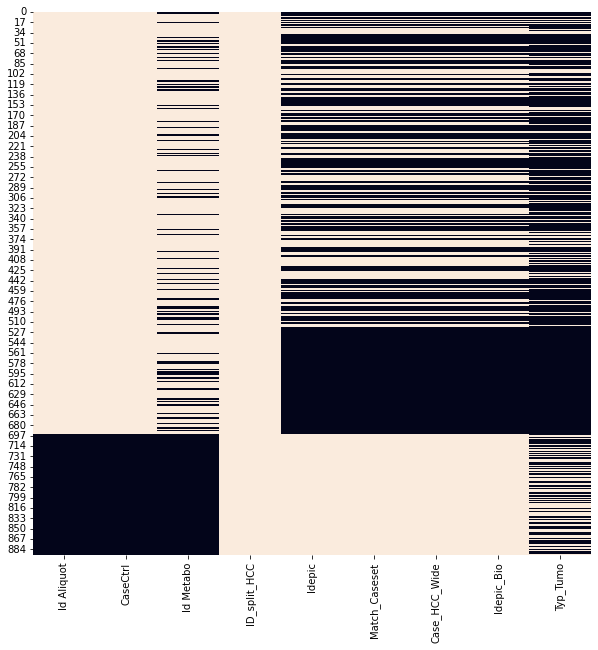

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(IDs_samples_merged.notna(), cbar=False);

In [8]:
IDs_samples_merged.dtypes.value_counts()

object     7
int64      1
float64    1
dtype: int64

In [9]:
int_col_2 = list(IDs_samples_merged.dtypes[IDs_samples_merged.dtypes == 'int64'].index)
int_col_2

['ID_split_HCC']

## Before merging, check which columns are in common, to combine them later

## We remove Idepic column from duplicated columns because we will merge the two dataframes based on this column

In [10]:
duplicated_col = list(set(HCC_metadata.columns) & set(IDs_samples_merged.columns))
duplicated_col.remove('Idepic')
duplicated_col

['Case_HCC_Wide', 'Typ_Tumo', 'Match_Caseset', 'Idepic_Bio']

### Now we merge based on *Idepic* column

In [11]:
IDs_samples_and_HCC_metadata = pd.merge(IDs_samples_merged, HCC_metadata, how='outer', on='Idepic')
IDs_samples_and_HCC_metadata

,Id Aliquot,CaseCtrl,Id Metabo,ID_split_HCC,Idepic,Match_Caseset_x,Case_HCC_Wide_x,Idepic_Bio_x,Typ_Tumo_x,A_Imputation_,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,71219179-s2#C,Non-case,NaN,71219179.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71220023-s2#C,Incident,NaN,71220023.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,81________7792-s1#C,Non-case,NaN,7792.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81________8367-s1#C,Incident,NaN,8367.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72479995-s2#C,Non-case,LivCan_001,72479995.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,NaN,NaN,NaN,NaN,61_____6110655,NaN,NaN,NaN,NaN,10.0,...,0.0,0.500697,0.310697,1.364376,0.0,1.0,0.0,1.0,2.0,2.200000
930,NaN,NaN,NaN,NaN,61_____6123276,NaN,NaN,NaN,NaN,10.0,...,0.0,0.830609,0.640609,1.897637,1.0,1.0,0.0,0.0,1.0,1.052632
931,NaN,NaN,NaN,NaN,61_____6121651,NaN,NaN,NaN,NaN,10.0,...,1.0,0.252308,NaN,1.286993,0.0,1.0,0.0,0.0,1.0,1.238806
932,NaN,NaN,NaN,NaN,61_____6122339,NaN,NaN,NaN,NaN,10.0,...,1.0,0.024343,NaN,1.024641,0.0,1.0,0.0,1.0,2.0,1.176471


### Print duplicated columns

In [12]:
IDs_samples_and_HCC_metadata[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]]

,Case_HCC_Wide_x,Typ_Tumo_x,Match_Caseset_x,Idepic_Bio_x,Case_HCC_Wide_y,Typ_Tumo_y,Match_Caseset_y,Idepic_Bio_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
929,NaN,NaN,NaN,NaN,Yes,HCC_Wide/,122.0,61____61106550
930,NaN,NaN,NaN,NaN,Yes,HCC_Wide/,141.0,61____61232762
931,NaN,NaN,NaN,NaN,Yes,HCC/,137.0,61____61216511
932,NaN,NaN,NaN,NaN,No,NaN,137.0,61____61223398


In [13]:
IDs_samples_and_HCC_metadata[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].isna().sum()

Case_HCC_Wide_x    508
Typ_Tumo_x         721
Match_Caseset_x    508
Idepic_Bio_x       508
Case_HCC_Wide_y    468
Typ_Tumo_y         701
Match_Caseset_y    468
Idepic_Bio_y       468
dtype: int64

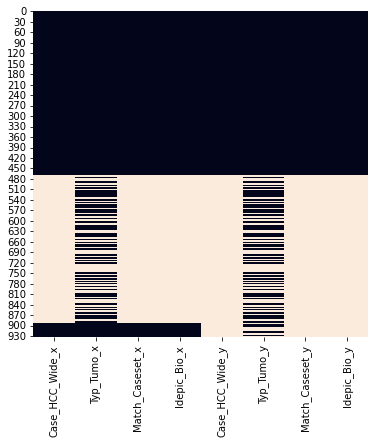

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(IDs_samples_and_HCC_metadata[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].notna(), cbar=False);

### Now we fill NaNs in columns with *_x* suffix with columns with *_y* suffix

In [15]:
for col in IDs_samples_and_HCC_metadata.columns[IDs_samples_and_HCC_metadata.columns.str[-2:] == '_x']:

    IDs_samples_and_HCC_metadata[col] = IDs_samples_and_HCC_metadata[col].fillna(IDs_samples_and_HCC_metadata[re.sub('_x', '_y', col)])
    IDs_samples_and_HCC_metadata.drop(re.sub('_x', '_y', col), axis=1)

In [16]:
IDs_samples_and_HCC_metadata[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].isna().sum()

Case_HCC_Wide_x    468
Typ_Tumo_x         701
Match_Caseset_x    468
Idepic_Bio_x       468
Case_HCC_Wide_y    468
Typ_Tumo_y         701
Match_Caseset_y    468
Idepic_Bio_y       468
dtype: int64

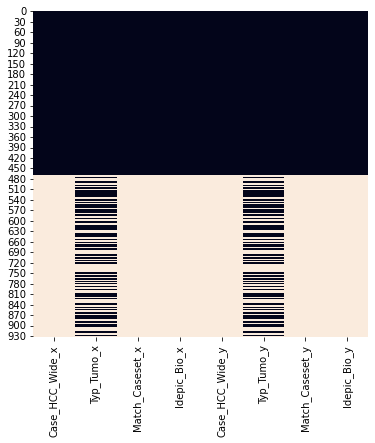

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(IDs_samples_and_HCC_metadata[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].notna(), cbar=False);

### Now we can drop columns with *_y* suffix and rename columns with *_x* suffix to initial name

In [18]:
for col in IDs_samples_and_HCC_metadata.columns[IDs_samples_and_HCC_metadata.columns.str[-2:] == '_x']:
    
    IDs_samples_and_HCC_metadata = IDs_samples_and_HCC_metadata.drop(re.sub('_x', '_y', col), axis=1)
    IDs_samples_and_HCC_metadata = IDs_samples_and_HCC_metadata.rename(columns={col: col[:-2]})
    

In [19]:
IDs_samples_and_HCC_metadata[duplicated_col]

,Case_HCC_Wide,Typ_Tumo,Match_Caseset,Idepic_Bio
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
929,Yes,HCC_Wide/,122.0,61____61106550
930,Yes,HCC_Wide/,141.0,61____61232762
931,Yes,HCC/,137.0,61____61216511
932,No,NaN,137.0,61____61223398


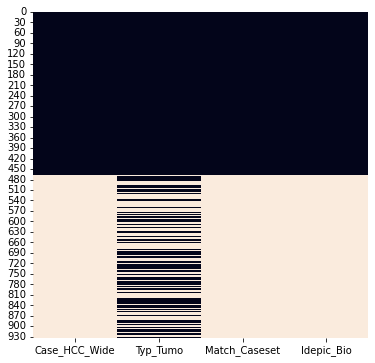

In [20]:
plt.figure(figsize=(6,6))
sns.heatmap(IDs_samples_and_HCC_metadata[duplicated_col].notna(), cbar=False);

## Now we re-convert float columns that were initially int

In [21]:
IDs_samples_and_HCC_metadata[int_col + int_col_2]

,A_Imputation_,Match_Caseset,Length,Length_Bld,Qge00,lab,HbV_status2,HcV_status2,BMI_cat,Age_blood_cat,...,elevatedbp,waist_idf,reduced_hdl1,fast_st1,elevated_tg1,point,point2,point3,bart,ID_split_HCC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71219179.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71220023.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7792.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8367.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72479995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,10.0,122.0,2.0,2.0,0.0,1.0,1.0,0.0,3.0,4.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,NaN
930,10.0,141.0,961.0,961.0,0.0,1.0,0.0,0.0,3.0,2.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN
931,10.0,137.0,252.0,252.0,0.0,1.0,1.0,1.0,3.0,3.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN
932,10.0,137.0,4765.0,4765.0,0.0,1.0,0.0,0.0,3.0,3.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,NaN


In [22]:
len(int_col)

31

In [23]:
len(int_col_2)

1

In [24]:
print(len(int_col + int_col_2))
int_col + int_col_2

32


['A_Imputation_',
 'Match_Caseset',
 'Length',
 'Length_Bld',
 'Qge00',
 'lab',
 'HbV_status2',
 'HcV_status2',
 'BMI_cat',
 'Age_blood_cat',
 'alc_drinker_m',
 'ALTsc2',
 'ASTsc2',
 'GGTsc2',
 'ALPsc2',
 'TBsc2',
 'score22',
 'score22_cat',
 'count',
 'n3',
 'fattyliver',
 'steat',
 'elevatedbp',
 'waist_idf',
 'reduced_hdl1',
 'fast_st1',
 'elevated_tg1',
 'point',
 'point2',
 'point3',
 'bart',
 'ID_split_HCC']

In [25]:
for col in int_col + int_col_2:
    
    print(f'Column {col} is type {IDs_samples_and_HCC_metadata[col].dtype}')
    print(f'Conversion...')
    IDs_samples_and_HCC_metadata[col] = pd.to_numeric(IDs_samples_and_HCC_metadata[col],errors='coerce').astype(pd.Int64Dtype())
    print(f'Column {col} is type {IDs_samples_and_HCC_metadata[col].dtype}')
    print()

Column A_Imputation_ is type float64
Conversion...
Column A_Imputation_ is type Int64

Column Match_Caseset is type float64
Conversion...
Column Match_Caseset is type Int64

Column Length is type float64
Conversion...
Column Length is type Int64

Column Length_Bld is type float64
Conversion...
Column Length_Bld is type Int64

Column Qge00 is type float64
Conversion...
Column Qge00 is type Int64

Column lab is type float64
Conversion...
Column lab is type Int64

Column HbV_status2 is type float64
Conversion...
Column HbV_status2 is type Int64

Column HcV_status2 is type float64
Conversion...
Column HcV_status2 is type Int64

Column BMI_cat is type float64
Conversion...
Column BMI_cat is type Int64

Column Age_blood_cat is type float64
Conversion...
Column Age_blood_cat is type Int64

Column alc_drinker_m is type float64
Conversion...
Column alc_drinker_m is type Int64

Column ALTsc2 is type float64
Conversion...
Column ALTsc2 is type Int64

Column ASTsc2 is type float64
Conversion...
Co

In [26]:
IDs_samples_and_HCC_metadata[int_col + int_col_2]

,A_Imputation_,Match_Caseset,Length,Length_Bld,Qge00,lab,HbV_status2,HcV_status2,BMI_cat,Age_blood_cat,...,elevatedbp,waist_idf,reduced_hdl1,fast_st1,elevated_tg1,point,point2,point3,bart,ID_split_HCC
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,71219179
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,71220023
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7792
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8367
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,72479995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,10,122,2,2,0,1,1,0,3,4,...,1,1,1,0,0,1,0,1,2,<NA>
930,10,141,961,961,0,1,0,0,3,2,...,1,1,0,0,1,1,0,0,1,<NA>
931,10,137,252,252,0,1,1,1,3,3,...,1,1,1,1,0,1,0,0,1,<NA>
932,10,137,4765,4765,0,1,0,0,3,3,...,1,1,0,1,0,1,0,1,2,<NA>


In [27]:
IDs_samples_and_HCC_metadata.dtypes.value_counts()

float64    801
object     108
Int64       32
dtype: int64

## Save merged dataframe

In [28]:
IDs_samples_and_HCC_metadata.to_csv(pwd + 'data/prepare_HCC_data/IDs_samples_and_HCC_metadata.csv', index = False, header=True)